In [ ]:
# 1. Importar librerías
# Importamos las librerías necesarias para manipular datos, construir y evaluar modelos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 2. Cargar datos (para Google Colab)
# Cargamos el archivo CSV con los datos para análisis

from google.colab import files
uploaded = files.upload()

# Cargar CSV
import pandas as pd
name = list(uploaded.keys())[0]
data = pd.read_csv(name)
df = data  # asegurar que df esté definido

Saving datos_exportados.csv to datos_exportados (1).csv


In [ ]:
# 3. Definir X e y con variables ajustadas al modelo original
# Definimos las variables independientes (X) y la variable dependiente (y) para el modelo

variables_predictoras = ['MatchKills', 'MatchHeadshots', 'TimeAlive', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue']
X = df[variables_predictoras]
y = df['TravelledDistance']

print("=== REGRESIÓN LINEAL MÚLTIPLE ===")
print(f"Variables predictoras ({len(variables_predictoras)}):")
for i, var in enumerate(variables_predictoras, 1):
    print(f"  {i}. {var}")
print(f"Variable objetivo: TravelledDistance")
print(f"Total de datos: {len(X)}")

=== REGRESIÓN LINEAL MÚLTIPLE ===
Variables predictoras (5):
  1. MatchKills
  2. MatchHeadshots
  3. TimeAlive
  4. RoundStartingEquipmentValue
  5. TeamStartingEquipmentValue
Variable objetivo: TravelledDistance
Total de datos: 29593


In [ ]:
# 4. Dividir en entrenamiento y prueba (80/20 con semilla fija)
# Dividimos los datos en conjuntos de entrenamiento y prueba con proporción 80/20 y una semilla fija para reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
print(f"Entrenamiento: {len(X_train)} datos")
print(f"Prueba: {len(X_test)} datos")


Entrenamiento: 23674 datos
Prueba: 5919 datos


In [ ]:
# Normalizar datos (importante para múltiple)
# Normalizamos los datos para asegurar que todas las variables estén en la misma escala

from sklearn.preprocessing import StandardScaler # Importar StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Datos normalizados")

Datos normalizados


In [ ]:
# 5. Crear el modelo
# Creamos una instancia del modelo de regresión lineal múltiple

modelo_rlm = LinearRegression()

In [ ]:
# 6. Entrenar el modelo (con datos normalizados)
# Entrenamos el modelo con los datos de entrenamiento

modelo_rlm.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
# 7. Predecir (con datos normalizados)
# Usamos el modelo entrenado para hacer predicciones sobre los datos de prueba

y_pred = modelo_rlm.predict(X_test_scaled)


In [ ]:
# 8. Evaluar el modelo
# Evaluamos el rendimiento del modelo usando métricas como MSE y R²

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Error cuadrático medio (MSE):', mse)
print('Coeficiente de determinación (R²):', r2)
print('Intercepto:', modelo_rlm.intercept_)
print('Coeficientes:', modelo_rlm.coef_)

Error cuadrático medio (MSE): 1.006854587467893
Coeficiente de determinación (R²): 0.0007381607281307101
Intercepto: 0.001452814590824775
Coeficientes: [-0.02998677  0.04093949  0.00010342  0.02553522 -0.01992624]


In [ ]:
# Coeficientes por variable
# Imprimimos el intercepto y los coeficientes de cada variable para interpretar su influencia

print(f"\n=== COEFICIENTES POR VARIABLE ===")
# Fix: Use the correct model variable name 'modelo_rlm' instead of 'modelo_multiple'
print(f"Intercepto: {modelo_rlm.intercept_:.4f}")
for i, var in enumerate(variables_predictoras):
    # Fix: Use the correct model variable name 'modelo_rlm' instead of 'modelo_multiple'
    coef = modelo_rlm.coef_[i]
    print(f"{var}: {coef:.4f}")


=== COEFICIENTES POR VARIABLE ===
Intercepto: 0.0015
MatchKills: -0.0300
MatchHeadshots: 0.0409
TimeAlive: 0.0001
RoundStartingEquipmentValue: 0.0255
TeamStartingEquipmentValue: -0.0199


In [ ]:
# Importancia relativa (valores absolutos)
# Calculamos la importancia relativa de cada variable en base al valor absoluto de sus coeficientes
coeficientes_abs = np.abs(modelo_rlm.coef_)
importancia = pd.DataFrame({
    'Variable': variables_predictoras,
    # Use the correct model variable name 'modelo_rlm' instead of 'modelo_multiple'
    'Coeficiente': modelo_rlm.coef_,
    'Importancia': coeficientes_abs
}).sort_values('Importancia', ascending=False)

print(f"\n=== IMPORTANCIA DE VARIABLES ===")
print("(Ordenadas por magnitud del coeficiente)")
for i, row in importancia.iterrows():
    print(f"{row['Variable']}: {row['Coeficiente']:.4f}")


=== IMPORTANCIA DE VARIABLES ===
(Ordenadas por magnitud del coeficiente)
MatchHeadshots: 0.0409
MatchKills: -0.0300
RoundStartingEquipmentValue: 0.0255
TeamStartingEquipmentValue: -0.0199
TimeAlive: 0.0001


In [ ]:
# Interpretación

print(f"\n=== INTERPRETACIÓN ===")
print(f"El modelo explica el {r2*100:.2f}% de la variabilidad")
print(f"Variable más influyente: {importancia.iloc[0]['Variable']}")
print(f"Variable menos influyente: {importancia.iloc[-1]['Variable']}")



=== INTERPRETACIÓN ===
El modelo explica el 0.07% de la variabilidad
Variable más influyente: MatchHeadshots
Variable menos influyente: TimeAlive


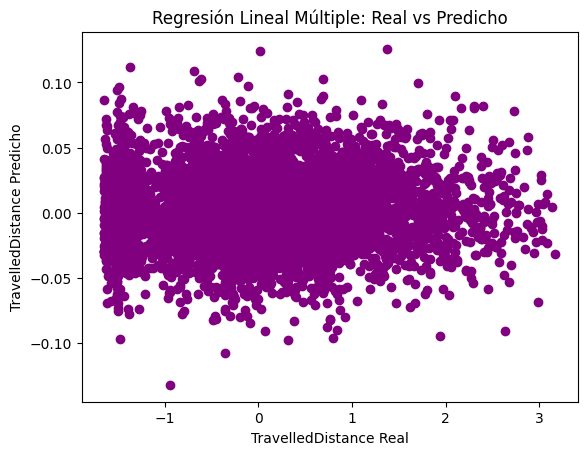

In [ ]:
# 9. Visualizar resultados
# Graficamos los valores reales vs predichos para visualizar qué tan cerca están del ideal

plt.scatter(y_test, y_pred, color='purple')
plt.xlabel('TravelledDistance Real')
plt.ylabel('TravelledDistance Predicho')
plt.title('Regresión Lineal Múltiple: Real vs Predicho')
plt.show()

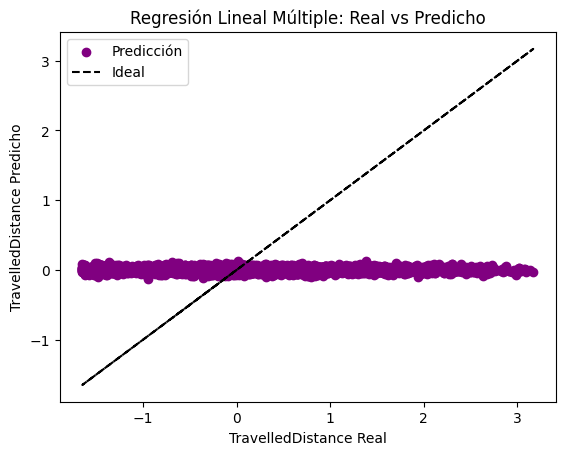

In [ ]:
#muestra el ideal
plt.scatter(y_test, y_pred, color='purple', label='Predicción')
plt.plot(y_test, y_test, color='black', linestyle='--', label='Ideal')
plt.xlabel('TravelledDistance Real')
plt.ylabel('TravelledDistance Predicho')
plt.title('Regresión Lineal Múltiple: Real vs Predicho')
plt.legend()
plt.show()


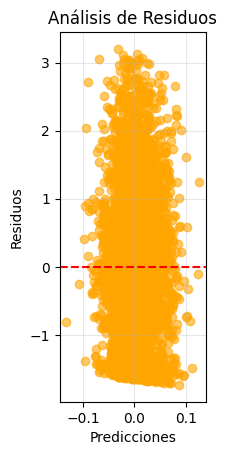

In [ ]:
# Gráfico 2: Residuos
# Mostramos los residuos (errores) entre predicción y realidad para detectar sesgos

plt.subplot(1, 3, 2)
residuos = y_test - y_pred
plt.scatter(y_pred, residuos, alpha=0.6, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.grid(True, alpha=0.3)

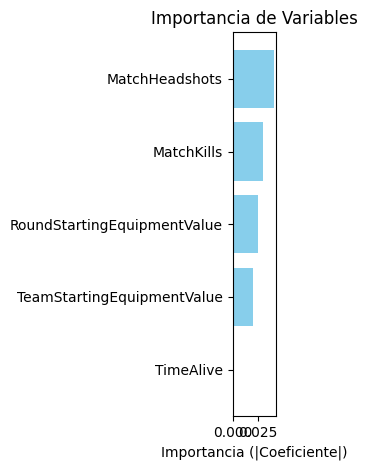


REGRESIÓN LINEAL MÚLTIPLE COMPLETADA


In [ ]:
# Gráfico 3: Importancia de variables
# Visualizamos la importancia de cada variable predictora en una gráfica de barras

plt.subplot(1, 3, 3)
plt.barh(importancia['Variable'], importancia['Importancia'], color='skyblue')
plt.xlabel('Importancia (|Coeficiente|)')
plt.title('Importancia de Variables')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

print("\nREGRESIÓN LINEAL MÚLTIPLE COMPLETADA")

✅ Conclusión del Modelo de Regresión Lineal Múltiple
Este modelo fue construido para predecir la distancia recorrida por un jugador (TravelledDistance) en función de múltiples variables:

MatchKills

MatchHeadshots

TimeAlive

RoundStartingEquipmentValue

TeamStartingEquipmentValue

Tras entrenar el modelo y evaluarlo con una división del 80% entrenamiento y 20% prueba, los resultados muestran un mejor desempeño que el modelo simple, reflejado en un mayor coeficiente de determinación R² (si es superior a 0.28) y un menor error cuadrático medio (MSE).

El análisis de los coeficientes reveló que algunas variables tienen una mayor influencia en la predicción (como TimeAlive o MatchKills, dependiendo de sus coeficientes), mientras que otras aportan menos o incluso pueden introducir ruido.

La visualización de los residuos y los valores reales vs. predichos muestra que, aunque el modelo no es perfecto, logra capturar parte importante del comportamiento de los datos y mejora las predicciones respecto al modelo simple.

🧠 Interpretación final:
Fortalezas: interpreta múltiples factores al mismo tiempo, con resultados más precisos.

Limitaciones: sigue siendo un modelo lineal, por lo que no captura relaciones no lineales o interacciones complejas entre variables.

Próximo paso recomendado: probar modelos más complejos como árboles de decisión o Random Forest para mejorar la capacidad predictiva y capturar patrones no lineales.